# Non Graded Challenge 12
Muahamad Bagus Septian - FTDS Batch 13

In [42]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Lakukan hypothesis testing terhadap dataset.


In [17]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [18]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [20]:
raw = df.copy()

In [21]:
df["Special Status"].unique()

array(['Daerah Khusus Ibu Kota', nan, 'Daerah Istimewa', 'Daerah Khusus'],
      dtype=object)

In [23]:
df["City or Regency"].value_counts()

Series([], Name: City or Regency, dtype: int64)

In [24]:
# drop missing value
df.drop("City or Regency", axis=1, inplace=True)

In [25]:
df.drop("Special Status", axis = 1, inplace=True)

In [26]:
# inputing missing value
df["Growth Factor of New Deaths"].fillna(0, inplace=True)

In [27]:
df["Growth Factor of New Cases"].fillna(0, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21117 non-null  object 
 13  Country         

In [29]:
df["Province"].fillna("None", inplace=True)

In [30]:
df["Island"].fillna("None", inplace=True)

In [31]:
df["Time Zone"].fillna("None", inplace=True)

In [32]:
df["Total Cities"].fillna(0, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21759 non-null  object 
 13  Country         

In [34]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,21759.000000,21759.000000,...,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,24.160256,5.706788,...,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.319534,0.952360
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,68.708265,16.266438,...,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,3.011735,1.524842
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,1.000000,0.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,7.000000,1.000000,...,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.560000,0.280000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,11.000000,2.000000,...,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,0.960000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,18.000000,4.000000,...,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.290000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,416.000000,98.000000,...,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [35]:
df.groupby(by="Province")[["Total Cases"]].mean().sort_values(by="Total Cases", ascending=False)

,Total Cases
Province,
None,1.447226e+06
DKI Jakarta,3.249128e+05
Jawa Barat,2.353360e+05
Jawa Tengah,1.647274e+05
Jawa Timur,1.405117e+05
Kalimantan Timur,5.462380e+04
Sulawesi Selatan,4.563586e+04
Daerah Istimewa Yogyakarta,4.488855e+04
Riau,4.233872e+04


Katakanlah pada data tersebut diperlukan pengecekan apakah terdapat perbedaan secara signifikan antara total kasus yang ditemukan pada provinsi Jawa Tengah dan provinsi Jawa Timur. Sehingga hipotesis dapat dinotasikan sebagai

**H0: μ_jatim = μ_jateng**

**H1: μ_jatim != μ_jateng**

In [48]:
jatim = df[df['Province']=='Jawa Timur'][['Date','Total Cases']].groupby('Date').sum()
jateng = df[df['Province']=='Jawa Tengah'][['Date','Total Cases']].groupby('Date').sum()

print('Rata-rata total kasus di Jawa Timur: {}'.format(np.round(jatim["Total Cases"].mean())))
print('Rata-rata total kasus di Jawa Tengah: {}'.format(np.round(jateng["Total Cases"].mean())))

Rata-rata total kasus di Jawa Timur: 140512.0
Rata-rata total kasus di Jawa Tengah: 164727.0


Pengujian hipotesis dengan Two Samples Independent Two Tailed Hypothesis Testing

In [43]:
t_stat, p_val = stats.ttest_ind(jatim,jateng)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 0.006176374827481741
t-statistics: -2.742899572182129


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


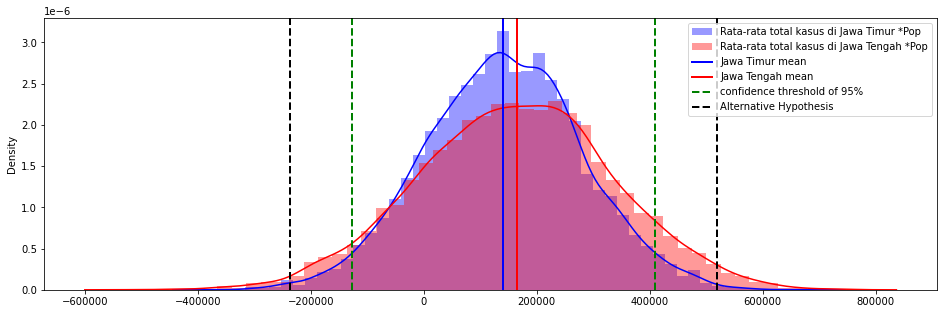

In [47]:
jatim_pop = np.random.normal(jatim["Total Cases"].mean(),jatim["Total Cases"].std(),10000)
jateng_pop = np.random.normal(jateng["Total Cases"].mean(),jateng["Total Cases"].std(),10000)

ci = stats.norm.interval(0.95, jatim["Total Cases"].mean(), jatim["Total Cases"].std())
plt.figure(figsize=(16,5))
sns.distplot(jatim_pop, label='Rata-rata total kasus di Jawa Timur *Pop',color='blue')
sns.distplot(jateng_pop, label='Rata-rata total kasus di Jawa Tengah *Pop',color='red')

plt.axvline(jatim["Total Cases"].mean(), color='blue', linewidth=2, label='Jawa Timur mean')
plt.axvline(jateng["Total Cases"].mean(), color='red',  linewidth=2, label='Jawa Tengah mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(jatim_pop.mean()+t_stat[0]*jatim_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jatim_pop.mean()-t_stat[0]*jatim_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

### 2. Ambil kesimpulan dari hasil analisa.

Pada pengujian hipotesis yang dilakukan untuk data total kasus antara provinsi Jawa Timur dan provinsi Jawa Tengah, ditemukan nilai $p < α$. Sehingga dapat disimpulkan dari hasil pengujian bahwa hypothesis null gagal ditolak. Hal tersebut berarti tidak terdapat perbedaan yang signifikan antara total kasus yang ditemukan pada provinsi Jawa Timur dan Jawa Tengah